In [1]:
import requests

In [2]:
import pandas as pd

### Gathering all the datasets

In [3]:
#Read the twitter-archive-enhanced dataset to df3 dataframe (Manual gathering)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#Programmatic gathering of image_predictions dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
response = requests.get(url)

In [7]:
with open('image_predictions.tsv', 'wb') as text:
    text.write(response.content)

In [8]:
# Read the image_predictions data to df1 dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
import tweepy

In [11]:
import json

In [12]:
import configparser

In [13]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [14]:
api_key  = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [15]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [320]:
with open ('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id']:   
        try:
            status = api.get_status(tweet_id)
            json.dump(status._json, file)
            file.write('\n')
        except Exception as e:
            pass

In [16]:
tweets = []
with open ('tweet_json.txt') as file:
    for line in file:
        l = json.loads(line)
        tweets.append({'tweet_id': l['id'],
                       'retweet_count': l['retweet_count'],
                       'favorite_count': l['favorite_count']})

In [17]:
#Read the tweets data extracted using tweepy api to df2 dataframe
tweets_data = pd.DataFrame(tweets)

### Accessing Data

#### Quality

- Remove columns which holds very low amount of data such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp from df3 dataframe
- Convert timestamp to be datetime in df3 dataframe
- Convert source data into readable values e.g iPhone, Twitter, and TweetDeck in df3 dataframe
- Change the column names for better readability
- There are erroneous dog names starting with lowercase characters (e.g. a, an, actually, by). All the erroneous names are in lowercase. All the erroneous are regarded as no name, thereby all lowercase value should be replaced with None
- Correct the 'rating_numerator' values from the text information for those that their numerators is greater than 15 and denominator not equal to 10
- 10 is the default value of ‘rating_denominator’, there are some denominators with incorrect value, convert all the rating_denominators to 10 and correct the rating_numerator
- The prediction dog breeds involve both uppercase and lowercase for the first letter. Capitalize the First Letters for uniformity

#### Tidiness

- group age stages (doggo, floofer, pupper, puppo) into one column as stage, grouping age stages (doggo, floofer, pupper, puppo) into one column as stage
- img_num contains values ranging from 1 to 4 but only 1 jpg_url is present in the dataset. This columns do not have strong basis to be included in the datasets.
- Merge all dataframes together as a single dataframe

#### Visual Assessment

In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
tweets_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6961,33648
1,892177421306343426,5265,29193
2,891815181378084864,3463,21954
3,891689557279858688,7182,36738
4,891327558926688256,7707,35137
...,...,...,...
2096,666049248165822465,36,88
2097,666044226329800704,114,245
2098,666033412701032449,36,100
2099,666029285002620928,39,112


In [20]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Programmatic Assessment

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2101 non-null   int64
 1   retweet_count   2101 non-null   int64
 2   favorite_count  2101 non-null   int64
dtypes: int64(3)
memory usage: 49.4 KB


In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Cleaning Data

In [24]:
# Make a copy of three dataframes
df1 = image_predictions.copy()
df2 = tweets_data.copy()
df3 = twitter_archive.copy()

### Quality 1.0

##### Remove remove retweets and replies from the dataset

In [25]:
#Remove replies and retweets
df3 = (df3.loc[df3['in_reply_to_status_id'].isna()])
df3 = (df3.loc[df3['retweeted_status_id'].isna()])
df3 = df3.reset_index()

In [26]:
#TEST
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       2097 non-null   int64  
 1   tweet_id                    2097 non-null   int64  
 2   in_reply_to_status_id       0 non-null      float64
 3   in_reply_to_user_id         0 non-null      float64
 4   timestamp                   2097 non-null   object 
 5   source                      2097 non-null   object 
 6   text                        2097 non-null   object 
 7   retweeted_status_id         0 non-null      float64
 8   retweeted_status_user_id    0 non-null      float64
 9   retweeted_status_timestamp  0 non-null      object 
 10  expanded_urls               2094 non-null   object 
 11  rating_numerator            2097 non-null   int64  
 12  rating_denominator          2097 non-null   int64  
 13  name                        2097 

### Quality 2.0

##### Remove columns which holds very low amount of data such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [27]:
#CODE - Drop columns with low amount of data
df3.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                 'retweeted_status_timestamp'], inplace=True)

In [28]:
#Test if the low data columns have been dropped
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               2097 non-null   int64 
 1   tweet_id            2097 non-null   int64 
 2   timestamp           2097 non-null   object
 3   source              2097 non-null   object
 4   text                2097 non-null   object
 5   expanded_urls       2094 non-null   object
 6   rating_numerator    2097 non-null   int64 
 7   rating_denominator  2097 non-null   int64 
 8   name                2097 non-null   object
 9   doggo               2097 non-null   object
 10  floofer             2097 non-null   object
 11  pupper              2097 non-null   object
 12  puppo               2097 non-null   object
dtypes: int64(4), object(9)
memory usage: 213.1+ KB


### Quality 3.0

##### Convert timestamp to be datetime

In [29]:
#CODE - convert timestamp datatype to date and time
df3.timestamp = pd.to_datetime(df3.timestamp)

In [30]:
#TEST
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   index               2097 non-null   int64              
 1   tweet_id            2097 non-null   int64              
 2   timestamp           2097 non-null   datetime64[ns, UTC]
 3   source              2097 non-null   object             
 4   text                2097 non-null   object             
 5   expanded_urls       2094 non-null   object             
 6   rating_numerator    2097 non-null   int64              
 7   rating_denominator  2097 non-null   int64              
 8   name                2097 non-null   object             
 9   doggo               2097 non-null   object             
 10  floofer             2097 non-null   object             
 11  pupper              2097 non-null   object             
 12  puppo               2097 non-null 

### Quality 4.0

##### Convert source data into readable values e.g iPhone, Twitter, and TweetDeck.

In [31]:
#CODE - Extract the unique values in the source column
df3.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [32]:
#Replace the value of the source column to readable values
df3.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
df3.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
df3.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
df3.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace=True)

In [33]:
#TEST 
df3.source.unique()

array(['iPhone', 'Twitter', 'Vine', 'TweetDeck'], dtype=object)

### Quality 5.0

##### Change the column names for better readability 

In [34]:
#rename timestamp to twee_date for readability
df3.rename(columns={'timestamp':"tweet_date"}, inplace=True)
df1.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [35]:
#Test if the column names has changed
df1.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  

### Quality 6.0

##### There are erroneous dog names starting with lowercase characters (e.g. a, an, actually, by). All the erroneous names are in lowercase. All the erroneous are regarded as no name, thereby all lowercase value should be replaced with None

In [36]:
#CODE - Extract the unique name in the name column
df3.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [37]:
#convert ambigious names of dogs to 'None'
df3['name'] = df3['name'].apply(lambda x: x if str(x).lower() != x else 'None')

In [38]:
#Test if the ambigious names have been converted to None
df3.name.value_counts()

None          707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

### Quality Issue 7.0 

##### Correct the 'rating_numerator' values from the text information

In [39]:
#Visualize the unique values in rating_denominator
df3.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

In [40]:
#Extract records that the rating denominator greater than 10 and save it in a new dataframe 
df4 = df3.query('rating_denominator > 10')
df4[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the flo...,84,70
700,758467244762497024,Why does this never happen at my front door......,165,150
853,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
904,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
985,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1011,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1036,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1056,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1129,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50


In [41]:
#Reduce the rating denominator to tens instead of hundreds for easy calculation of the rating_numerator
df4['rating_denominator'] = (df4.rating_denominator/10).astype(int)
df4.head()

/tmp/ipykernel_1102501/3862824301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating_denominator'] = (df4.rating_denominator/10).astype(int)


,index,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
339,433,820690176645140481,2017-01-15 17:52:40+00:00,iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,7,None,None,None,None,None
700,902,758467244762497024,2016-07-28 01:00:57+00:00,iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,15,None,None,None,None,None
853,1068,740373189193256964,2016-06-08 02:41:38+00:00,iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,1,None,None,None,None,None
904,1120,731156023742988288,2016-05-13 16:15:54+00:00,iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,17,None,None,None,None,None
948,1165,722974582966214656,2016-04-21 02:25:47+00:00,iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,2,None,None,None,None,None


In [42]:
#Divide the rating numerator by rating denominator to get the exact rating of the dogs in units of tens
df4['rating_numerator'] = (df4.rating_numerator/df4.rating_denominator)

/tmp/ipykernel_1102501/3567478848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating_numerator'] = (df4.rating_numerator/df4.rating_denominator)


In [43]:
#Test the rating_numerator after the division to confirm if it is the same rating showing in the text
df4[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].value_counts()

tweet_id            text                                                                                                                                                rating_numerator  rating_denominator
675853064436391936  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                         11.0              8                     1
677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                              12.0              12                    1
682962037429899265  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5         7.0               1                     1
684222868335505415  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55     

In [44]:
#Update the rating numerator of the tweets with wrong numerator
df4.loc[df4.tweet_id == 740373189193256964, ['rating_numerator']] = 14 
df4.loc[df4.tweet_id == 722974582966214656, ['rating_numerator']] = 13 
df4.loc[df4.tweet_id == 716439118184652801, ['rating_numerator']] = 11 
df4.loc[df4.tweet_id == 682962037429899265, ['rating_numerator']] = 10 

In [45]:
#Test
df4[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the flo...,12.0,7
700,758467244762497024,Why does this never happen at my front door......,11.0,15
853,740373189193256964,"After so many requests, this is Bretagne. She ...",14.0,1
904,731156023742988288,Say hello to this unbelievably well behaved sq...,12.0,17
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,13.0,2
985,716439118184652801,This is Bluebert. He just saw that both #Final...,11.0,5
1011,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,11.0,9
1036,710658690886586372,Here's a brigade of puppers. All look very pre...,10.0,8
1056,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",9.0,5
1129,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,12.0,5


In [46]:
#Convert rating_numerator from floats to int
df4['rating_numerator'] = df4['rating_numerator'].astype(int)

/tmp/ipykernel_1102501/2796480766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['rating_numerator'] = df4['rating_numerator'].astype(int)


In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 339 to 1602
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   index               15 non-null     int64              
 1   tweet_id            15 non-null     int64              
 2   tweet_date          15 non-null     datetime64[ns, UTC]
 3   source              15 non-null     object             
 4   text                15 non-null     object             
 5   expanded_urls       15 non-null     object             
 6   rating_numerator    15 non-null     int64              
 7   rating_denominator  15 non-null     int64              
 8   name                15 non-null     object             
 9   doggo               15 non-null     object             
 10  floofer             15 non-null     object             
 11  pupper              15 non-null     object             
 12  puppo               15 non-null   

In [48]:
#Replace the instances of rating numerator and denominator in the df3 dataframe with the calculated ratings 
df3.loc[df3.tweet_id.isin(df4.tweet_id), ['rating_numerator']] = df4[['rating_numerator']]

In [49]:
#Test
df3.loc[df3['tweet_id'] == 682962037429899265]

,index,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1426,1662,682962037429899265,2016-01-01 16:30:13+00:00,iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,11,Darrel,None,None,None,None


### Quality Issue 8.0
##### 10 is the default value of ‘rating_denominator’, there are some denominators with incorrect value, convert all the rating_denominators to 10 

In [50]:
#CODE - convert all rating_denominator not equal to 10 to 10
df3['rating_denominator'].mask(df3['rating_denominator'] !=10 ,10, inplace=True)

In [51]:
#TEST - Confirm if the updates has been done in the main dataset
df3.loc[df3['tweet_id'] == 677716515794329600]

,index,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1540,1779,677716515794329600,2015-12-18 05:06:23+00:00,iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,12,10,None,None,None,None,None


### Quality 9.0
##### The prediction dog breeds involve both uppercase and lowercase for the first letter. Capitalize the First Letters for uniformity

In [60]:
#CCODE - apitalize first letter by using Capitalize method
df1.first_prediction=df1.first_prediction.str.capitalize()
df1.second_prediction=df1.second_prediction.str.capitalize()
df1.third_prediction=df1.third_prediction.str.capitalize()

In [61]:
#TEST
df1.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness 1.0

##### Combine doggo, floofer, pupper, and puppo columns into one column (features) to enhance readability for better analysis

In [62]:
#Unique values in Doggo
df3.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [63]:
#Unique values in Floofer
df3.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [64]:
#Unique values in Pupper
df3.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [65]:
#Unique values in Puppo
df3.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [66]:
#Extract stages from the four columns and store it in Stage column
df3['stage'] = df3['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [67]:
#Test if the datatype for the four columns has been changed to int
df3.stage.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: stage, dtype: int64

In [68]:
#CODE - Drop pupper, doggo, puppo and floofer columns
df3.drop(columns=['pupper', 'doggo', 'puppo', 'floofer'], inplace=True)

In [69]:
#Test
df3

,index,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...
2092,2351,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2093,2352,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,NaN
2094,2353,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,NaN
2095,2354,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,NaN


### Tidiness 2.0

img_num contains values ranging from 1 to 4 but only 1 jpg_url is present in the dataset. This columns do not have strong basis to be included in the datasets. Removed it from the dataset as it is not relevant for any analysis.

In [70]:
#CODE 
df1 = df1.drop(['img_num'], axis=1)

In [71]:
#TEST
df1

,tweet_id,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Tidiness 3.0

Merge all dataframes together as a single dataframe 

In [72]:
#Merge all dataframes as a single dataframe
df = df1.merge(df2,on='tweet_id').merge(df3,on='tweet_id')

In [73]:
#Test
df.head()

,tweet_id,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,...,favorite_count,index,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,...,2279,2355,2015-11-15 22:32:08+00:00,iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,...,112,2354,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,...,100,2353,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,...,245,2352,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,...,88,2351,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1759 entries, 0 to 1758
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1759 non-null   int64              
 1   jpg_url             1759 non-null   object             
 2   first_prediction    1759 non-null   object             
 3   first_confidence    1759 non-null   float64            
 4   first_dog           1759 non-null   bool               
 5   second_prediction   1759 non-null   object             
 6   second_confidence   1759 non-null   float64            
 7   second_dog          1759 non-null   bool               
 8   third_prediction    1759 non-null   object             
 9   third_confidence    1759 non-null   float64            
 10  third_dog           1759 non-null   bool               
 11  retweet_count       1759 non-null   int64              
 12  favorite_count      1759 non-null 

### Store Data 

In [75]:
# save and store cleaned data in csv
df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

### Analysis and Visualization

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Most Popular Dog Names')

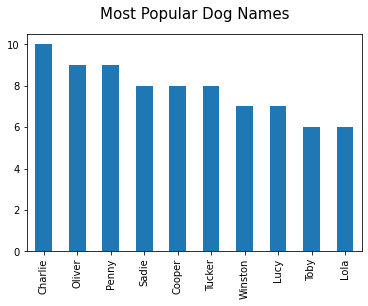

In [77]:
# 10 Most Popular Dog Names
df = pd.read_csv('twitter_archive_master.csv')
dog_names = df.query('name != "None"')
dog_order = dog_names['name'].value_counts().head(10)
dog_order.plot.bar()
plt.title("Most Popular Dog Names",{'fontsize': 15},pad=15)

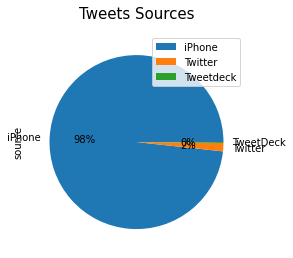

In [78]:
# Most Used Sources of Tweets
import matplotlib.pyplot as plt
source = df['source'].value_counts()
source.plot(
    kind='pie', y='Sources of Tweets', autopct='%1.0f%%')
plt.title("Tweets Sources",{'fontsize': 15},pad=15)
plt.legend(["iPhone", "Twitter", "Tweetdeck"])

The most popular source of tweets for we_rate_dogs is <b>iphone</b> with about 98% of all the sources. 

Text(0.5, 1.0, 'Dog Stages')

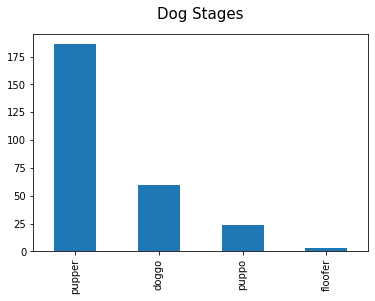

In [79]:
# Visualization of Dog Stages
import matplotlib.pyplot as plt
stage = df['stage'].value_counts()
stage.plot.bar()
plt.title("Dog Stages",{'fontsize': 15},pad=15)

Although the stages of most dogs are unknown but there are more numbers of dogs in <b>pupper</b> stages compared to other stages.

Text(0, 0.5, 'Retweets')

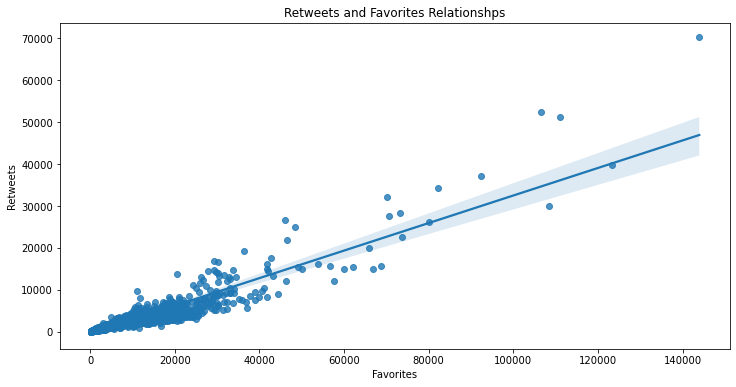

In [80]:
plt.figure(figsize=(12,6))
sns.regplot(x=df.favorite_count, y=df.retweet_count)
plt.title("Retweets and Favorites Relationshps")
plt.xlabel('Favorites')
plt.ylabel('Retweets')

The visualization shows that retweets and favourites are highly correlated i.e. the higher the number of retweets, the higher the number of favourites

## Conclusion

Data Wrangling Process carried out, although there could be further cleaning. I have stored the wrangled data in twitter_archive_master.csv file with a minored number of issues, and ready for a Data Analysis. This file has 1759 observations and 22 features. Below are the analyses based on the wrangled data
- The most popular dog stages is puppo
- There are more tweets from iphone (approximately 98%) compared to other sources.
- There is correlation between retweets and favorites